<h1>Lesson 3. Classification: Credit worthiness from German bank</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Flag_map_of_Germany.svg" style="height:200px;">
  
  <p>In this exercise you will predict credit worthiness of custmers of a German bank (<a href="https://archive.ics.uci.edu/ml/datasets/statlog+(german+credit+data)">provided by Hans Hofmann from Univeristy of Hamburg</a>). The data we will be working with here is a reduced version of the full dataset.</p>
<p>The following features are available for the 1000-row dataset:</p>
<ul>
<li>Class: Credit worthiness (what you are trying to predict)</li>
<li>Duration: Duration of the credit (in months) </li>
<li>Amount: Amount of money asked for (in Deutche Marks (DM))</li>
<li>InstallmentRatePercentage: Installment rate in percentage of disposable income </li>
<li>ResidenceDuration: Number of years at current residence</li>
<li>Age: Person's age</li>
<li>NumberExistingCredits: Number of credit accounts</li>
<li>NumberPeopleMaintenance: Number of people being liable to provide maintenance for the credit</li>
<li>Telephone: Is there a phone number associated with the customer name?  </li>
<li>ForeignWorker: Is the person a foreign worker?</li>
<li>CheckingAccountStatus: Amount of money in the checking account (in DM)<ul>
<li>CheckingAccountStatus.lt.0</li>
<li>CheckingAccountStatus.0.to.200</li>
<li>CheckingAccountStatus.gt.200</li>
</ul></li>
<li>CreditHistory: Past credit history<ul>
<li>CreditHistory.ThisBank.AllPaid</li>
<li>CreditHistory.PaidDuly</li>
<li>CreditHistory.Delay</li>
<li>CreditHistory.Critical</li>
</ul></li>
</ul>

<p>This dataset is available in <a href="http://caret.r-forge.r-project.org/">'caret'</a> library. Let's load it and see how it looks:</p>

In [1]:
import pandas as pd

# loading the training and test dataset
credit_train = pd.read_csv('credit_train.csv')
credit_test = pd.read_csv('credit_test.csv')

credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,Good,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,Bad,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,Good,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,Good,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,Good,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.1. Show a boxplot of the age of the person asking for the credit vs. their credit worthiness for the training data. Is age a good predictor of the credit worthiness?</h3>

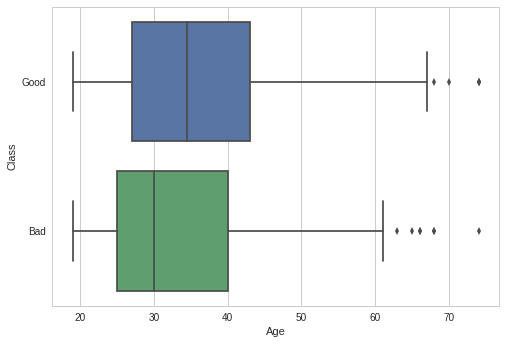

In [2]:
# Put the command (or commands) here that would give an answer to the above question.
import seaborn as sns
import matplotlib as plt
sns.set(style="whitegrid")

sns.boxplot(x="Age", y="Class", data=credit_train)
sns.plt.show()
# Comment whether age is a good predictor
# On average people with bad credit tend to be younger. 

<h3>Q.2. Can you generate a table that shows CreditHistory.Critical vs. Credit Worthiness for the training data. Can you comment whether person with critical credit history is more credit worthy?</h3> 

In [4]:
pd.crosstab(credit_train['CreditHistory.Critical'],credit_train['Class'])

Class,Bad,Good
CreditHistory.Critical,,
0,208,373
1,38,189


<h3>Q.3. Binarize the y output for e.g. 0 = 'bad' credit; 1 = 'good' credit. </h3>

In [3]:
credit_train['Class'] = (credit_train['Class']=='Good').astype(int)
credit_train.head()

,Class,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical
0,1,6,1169,4,4,67,2,1,0,1,1,0,0,0,0,0,1
1,0,48,5951,2,2,22,1,1,1,1,0,1,0,0,1,0,0
2,1,12,2096,2,3,49,1,2,1,1,0,0,0,0,0,0,1
3,1,36,9055,2,4,35,1,2,0,1,0,0,0,0,1,0,0
4,1,24,2835,3,4,53,1,1,1,1,0,0,0,0,1,0,0


<h3>Q.4. Generate a logistic regression model that uses the data. Provide a summary of the model. </h3>

In [4]:
from sklearn.linear_model import LogisticRegression

X = credit_train.loc[:, credit_train.columns != 'Class']
y = credit_train.loc[:, credit_train.columns == 'Class']


lrm = LogisticRegression()

result = lrm.fit(X,y.values.ravel())

print(result.score)


<bound method ClassifierMixin.score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)>


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [5]:
# Use another approach
import statsmodels.api as sm
logit_model = sm.Logit(y, X)
lg_result = logit_model.fit()
print(lg_result.summary2())

Optimization terminated successfully.
         Current function value: 0.500673
         Iterations 6
                                Results: Logit
Model:                   Logit                 No. Iterations:        6.0000  
Dependent Variable:      Class                 Pseudo R-squared:      0.185   
Date:                    2018-10-27 10:22      AIC:                   841.0882
No. Observations:        808                   BIC:                   916.2012
Df Model:                15                    Log-Likelihood:        -404.54 
Df Residuals:            792                   LL-Null:               -496.59 
Converged:               1.0000                Scale:                 1.0000  
------------------------------------------------------------------------------
                                Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------------
Duration                       -0.0236   0.0095 -2.4749 0.013

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<h3>Q.5. Using the developed model, predict the values in credit_test and use it to output a confusion matrix.</h3>

In [7]:
X_test = credit_test.loc[:, credit_test.columns != 'Class']

#Need to binarize the test data
credit_test['Class'] = (credit_test['Class']=='Good').astype(int)

y_test = credit_test.loc[:, credit_test.columns == 'Class']

y_pred = lrm.predict(X_test)

print(lrm.score(X_test, y_test))


0.6927083333333334


In [10]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

(tn, fp, fn, tp)

(18, 36, 23, 115)

<h3>Q.6. What is the accuracy of the model on the test data?</h3>

In [12]:
# Command that outputs acccuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)


0.6927083333333334

<h3>Q.7. Generate the ROC curve.</h3>

In [20]:
from sklearn.metrics import roc_curve

y_pred_prob = lrm.predict_proba(X)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y, y_pred_prob) 


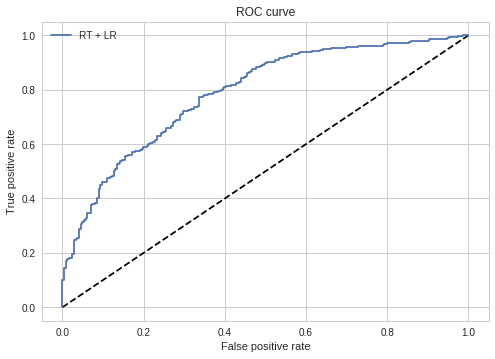

In [22]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_train, tpr_train, label='RT + LR')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

<h3>Q.8. What is the ROC AUC of the model on the test data?</h3>

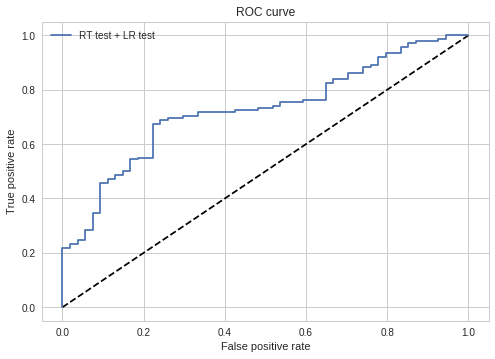

In [24]:
# Command(s):
y_pred_prob_test = lrm.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_prob_test) 

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_test, tpr_test, label='RT test + LR test')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


<h3>Q.9. Calculate LDA model on credit_train.</h3>

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
X = credit_train.loc[:, credit_train.columns != 'Class']
y = credit_train.loc[:, credit_train.columns == 'Class']

clf.fit(X, y.values.ravel())


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

<h3>Q.10. What is the accuracy of the new model?</h3>

In [31]:
y_pred_lda = clf.predict(X_test)
accuracy_score(y_test, y_pred_lda)



0.6875